# things to add: add different sklearn models and test accuracy

Import analysis and visualization libraries for EDA

In [1]:
# Data analysis and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Datascience libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import data from CSV file

In [2]:
# Import data
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Descriptive Stats on data

In [5]:
print('Train Info')
train.info()
print('\n'*2+'Test Info')
test.info()

Train Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Test Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare      

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Checking for null values in data

In [8]:
print('Train null count: \n' + str(train.isnull().sum()) + '\n')
print('Test null count: \n' + str(test.isnull().sum()) + '\n')

Train null count: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test null count: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64



Text(0.5,1,'Test Data')

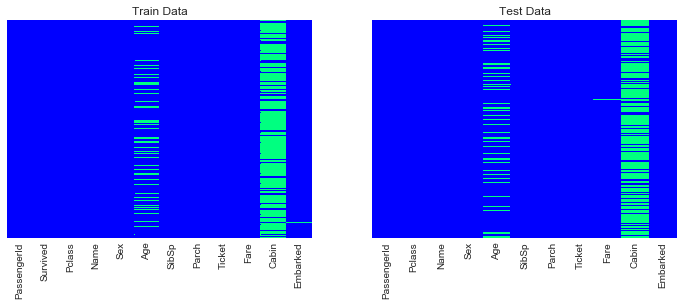

In [9]:
#Visualization of Null Values
f,(ax1,ax2) = plt.subplots(1,2, figsize = (12,4))
sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='winter',ax=ax1).set_title('Train Data')
sns.heatmap(test.isnull(),yticklabels = False,cbar=False,cmap='winter',ax=ax2).set_title('Test Data')

In [10]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

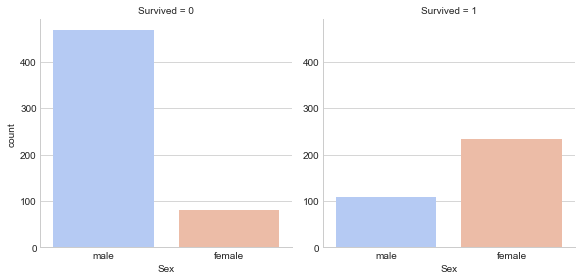

In [11]:
g = sns.factorplot(data = train, x = 'Sex', col = 'Survived',kind = 'count', palette = 'coolwarm')

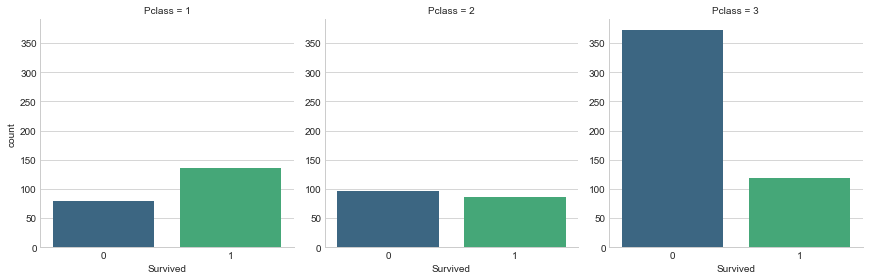

In [12]:
g = sns.factorplot(data = train, x = 'Survived' , col = 'Pclass',kind = 'count', palette = 'viridis')

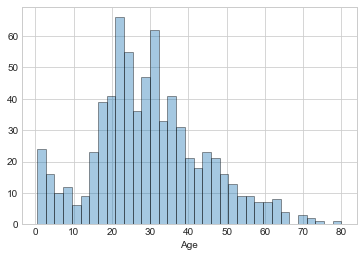

In [13]:
sns.distplot(train['Age'].dropna(),kde=False,bins=35, hist_kws=dict(edgecolor="k", linewidth=1))

Text(0.5,1,'Distribution of Fare')

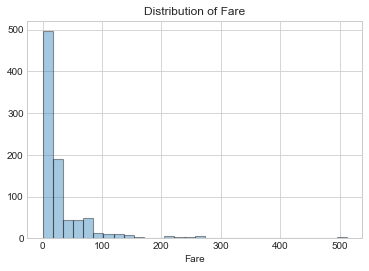

In [14]:
sns.distplot(train['Fare'],bins = 30,kde=False,hist_kws=dict(edgecolor="k", linewidth=1.1)).set_title(
    'Distribution of Fare')

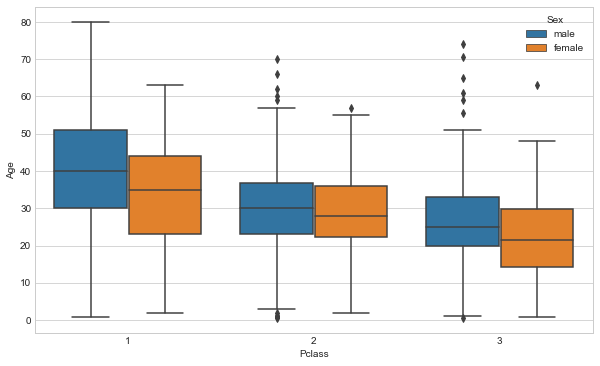

In [15]:
plt.figure(figsize = (10,6))
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=train)

In [16]:
mean_age1 = train[train['Pclass'] == 1]
mean_age2 = train[train['Pclass'] == 2]
mean_age3 = train[train['Pclass'] == 3]

print('Mean Age for First Class : '+ str(int(round(mean_age1['Age'].mean()))))
print('Mean Age for Second Class : '+ str(int(round(mean_age2['Age'].mean()))))
print('Mean Age for Third Class : '+ str(int(round(mean_age3['Age'].mean()))))

Mean Age for First Class : 38
Mean Age for Second Class : 30
Mean Age for Third Class : 25


In [17]:
#Function to fill in missing ages for passengers in the train and test data
def age_estimator(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 225
    else:
        return Age

In [18]:

train['Age'] = train[['Age','Pclass']].apply(age_estimator,axis = 1)
test['Age'] = test[['Age','Pclass']].apply(age_estimator,axis = 1)

Text(0.5,1,'Test Data')

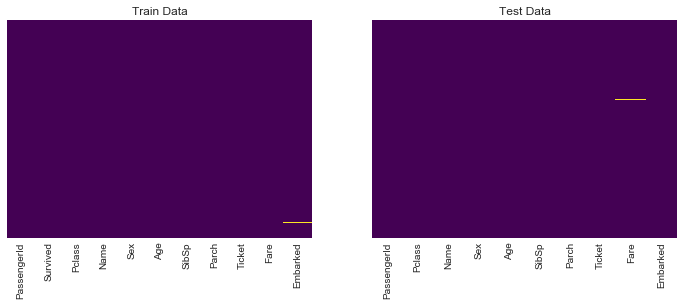

In [19]:
f,(ax1,ax2) = plt.subplots(1,2, figsize = (12,4))

sns.heatmap(train.isnull(),yticklabels = False,cbar=False,cmap='viridis',ax=ax1).set_title('Train Data')
sns.heatmap(test.isnull(),yticklabels = False,cbar=False,cmap='viridis',ax=ax2).set_title('Test Data')


In [20]:
null_test = test[test['Fare'].isnull() == True]
null_train = train[train['Embarked'].isnull() == True]

nulls = pd.concat([null_test, null_train],axis = 0)
nulls.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [21]:
#Drop null values from test and train data
test.dropna(inplace=True)
train.dropna(inplace=True)

In [22]:
#Make dummies for Sex and Embarked for Train and Test dataframes
sex_train = pd.get_dummies(train['Sex'],drop_first = True)
embark_train = pd.get_dummies(train['Embarked'],drop_first= True)

sex_test = pd.get_dummies(test['Sex'],drop_first = True)
embark_test = pd.get_dummies(test['Embarked'],drop_first= True)

#Concatenates train/test, sex, and embark dataframes
train = pd.concat([train,sex_train,embark_train],axis=1)
test = pd.concat([test,sex_test,embark_test],axis=1)


In [23]:
#Dropping redundant columns and columns that don't include numerical data
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'], axis = 1,inplace=True)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

## Model Selection

Logistic Regression

In [24]:
X_train = train.drop('Survived',axis=1)
y_train = train['Survived']
X_test = test.drop('PassengerId',axis=1)

In [25]:
#Creates logistic regression model
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

#Predictions for test data based on model 
y_predict = logmodel.predict(X_test)

#Accuracy score percentage
log_score = ((logmodel.score(X_train,y_train))*100)
print('{:.3f}'.format(log_score))

79.865


SVM

In [26]:
#Creates Support Vector Machine model
svmmodel = SVC()
svmmodel.fit(X_train,y_train)

y_predict = svcmodel.predict(X_test)

#SVM Score percentage
svm_score = ((svmmodel.score(X_train,y_train))*100)
print('{:.3f}'.format(svm_score))

NameError: name 'svcmodel' is not defined

Decision Tree

In [ ]:
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)

y_predict = dtmodel.predict(X_test)

dt_score = ((dtmodel.score(X_train,y_train))*100)
print('{:.3f}'.format(dt_score))

Random Forest

In [ ]:

rfcmodel = RandomForestClassifier(n_estimators=60)
rfcmodel.fit(X_train,y_train)

y_predict = rfcmodel.predict(X_test)

rfc_score = ((rfcmodel.score(X_train,y_train))*100)
print('{:.3f}'.format(rfc_score))